# Import

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

# Setting

In [37]:
pd.set_option("display.max_rows", None)  # 모든 행 출력
pd.set_option("display.max_columns", None)  # 모든 열 출력

rc('font', family='AppleGothic')

# Data

In [12]:
file_path = '/Users/toad/Documents/ToyProject/LG_Aimers_Infertility/'


In [68]:
train = pd.read_csv(file_path + 'Data/train.csv').drop(columns=['ID'])
test = pd.read_csv(file_path + 'Data/test.csv').drop(columns=['ID'])

In [44]:
categorical_columns = [
    "시술 시기 코드","시술 당시 나이","시술 유형","특정 시술 유형","배란 자극 여부","배란 유도 유형","단일 배아 이식 여부","착상 전 유전 검사 사용 여부","착상 전 유전 진단 사용 여부","남성 주 불임 원인","남성 부 불임 원인","여성 주 불임 원인",
    "여성 부 불임 원인","부부 주 불임 원인","부부 부 불임 원인","불명확 불임 원인","불임 원인 - 난관 질환","불임 원인 - 남성 요인","불임 원인 - 배란 장애","불임 원인 - 여성 요인","불임 원인 - 자궁경부 문제","불임 원인 - 자궁내막증",
    "불임 원인 - 정자 농도","불임 원인 - 정자 면역학적 요인","불임 원인 - 정자 운동성","불임 원인 - 정자 형태","배아 생성 주요 이유","총 시술 횟수","클리닉 내 총 시술 횟수","IVF 시술 횟수","DI 시술 횟수","총 임신 횟수","IVF 임신 횟수",
    "DI 임신 횟수","총 출산 횟수","IVF 출산 횟수","DI 출산 횟수","난자 출처","정자 출처","난자 기증자 나이","정자 기증자 나이","동결 배아 사용 여부","신선 배아 사용 여부","기증 배아 사용 여부","대리모 여부","PGD 시술 여부","PGS 시술 여부"
]

In [51]:
numeric_columns = [
    "임신 시도 또는 마지막 임신 경과 연수","총 생성 배아 수","미세주입된 난자 수","미세주입에서 생성된 배아 수","이식된 배아 수","미세주입 배아 이식 수","저장된 배아 수","미세주입 후 저장된 배아 수","해동된 배아 수","해동 난자 수","수집된 신선 난자 수",
    "저장된 신선 난자 수","혼합된 난자 수","파트너 정자와 혼합된 난자 수","기증자 정자와 혼합된 난자 수","난자 채취 경과일","난자 해동 경과일","난자 혼합 경과일","배아 이식 경과일","배아 해동 경과일"
]

In [26]:
print(f'Columns : {train.columns.values}')
print(f'Shape : {train.shape}')
print(f'Null : {train.isnull().sum().to_string()}')

Columns : ['ID' '시술 시기 코드' '시술 당시 나이' '임신 시도 또는 마지막 임신 경과 연수' '시술 유형' '특정 시술 유형'
 '배란 자극 여부' '배란 유도 유형' '단일 배아 이식 여부' '착상 전 유전 검사 사용 여부' '착상 전 유전 진단 사용 여부'
 '남성 주 불임 원인' '남성 부 불임 원인' '여성 주 불임 원인' '여성 부 불임 원인' '부부 주 불임 원인'
 '부부 부 불임 원인' '불명확 불임 원인' '불임 원인 - 난관 질환' '불임 원인 - 남성 요인' '불임 원인 - 배란 장애'
 '불임 원인 - 여성 요인' '불임 원인 - 자궁경부 문제' '불임 원인 - 자궁내막증' '불임 원인 - 정자 농도'
 '불임 원인 - 정자 면역학적 요인' '불임 원인 - 정자 운동성' '불임 원인 - 정자 형태' '배아 생성 주요 이유'
 '총 시술 횟수' '클리닉 내 총 시술 횟수' 'IVF 시술 횟수' 'DI 시술 횟수' '총 임신 횟수' 'IVF 임신 횟수'
 'DI 임신 횟수' '총 출산 횟수' 'IVF 출산 횟수' 'DI 출산 횟수' '총 생성 배아 수' '미세주입된 난자 수'
 '미세주입에서 생성된 배아 수' '이식된 배아 수' '미세주입 배아 이식 수' '저장된 배아 수' '미세주입 후 저장된 배아 수'
 '해동된 배아 수' '해동 난자 수' '수집된 신선 난자 수' '저장된 신선 난자 수' '혼합된 난자 수'
 '파트너 정자와 혼합된 난자 수' '기증자 정자와 혼합된 난자 수' '난자 출처' '정자 출처' '난자 기증자 나이'
 '정자 기증자 나이' '동결 배아 사용 여부' '신선 배아 사용 여부' '기증 배아 사용 여부' '대리모 여부'
 'PGD 시술 여부' 'PGS 시술 여부' '난자 채취 경과일' '난자 해동 경과일' '난자 혼합 경과일' '배아 이식 경과일'
 '배아 해동 경과일' '임신 성공 여부']
Shape : (256351, 69)
Null : ID                            0
시술

In [71]:
train.head()

,시술 시기 코드,시술 당시 나이,임신 시도 또는 마지막 임신 경과 연수,시술 유형,특정 시술 유형,배란 자극 여부,배란 유도 유형,단일 배아 이식 여부,착상 전 유전 검사 사용 여부,착상 전 유전 진단 사용 여부,남성 주 불임 원인,남성 부 불임 원인,여성 주 불임 원인,여성 부 불임 원인,부부 주 불임 원인,부부 부 불임 원인,불명확 불임 원인,불임 원인 - 난관 질환,불임 원인 - 남성 요인,불임 원인 - 배란 장애,불임 원인 - 여성 요인,불임 원인 - 자궁경부 문제,불임 원인 - 자궁내막증,불임 원인 - 정자 농도,불임 원인 - 정자 면역학적 요인,불임 원인 - 정자 운동성,불임 원인 - 정자 형태,배아 생성 주요 이유,총 시술 횟수,클리닉 내 총 시술 횟수,IVF 시술 횟수,DI 시술 횟수,총 임신 횟수,IVF 임신 횟수,DI 임신 횟수,총 출산 횟수,IVF 출산 횟수,DI 출산 횟수,총 생성 배아 수,미세주입된 난자 수,미세주입에서 생성된 배아 수,이식된 배아 수,미세주입 배아 이식 수,저장된 배아 수,미세주입 후 저장된 배아 수,해동된 배아 수,해동 난자 수,수집된 신선 난자 수,저장된 신선 난자 수,혼합된 난자 수,파트너 정자와 혼합된 난자 수,기증자 정자와 혼합된 난자 수,난자 출처,정자 출처,난자 기증자 나이,정자 기증자 나이,동결 배아 사용 여부,신선 배아 사용 여부,기증 배아 사용 여부,대리모 여부,PGD 시술 여부,PGS 시술 여부,난자 채취 경과일,난자 해동 경과일,난자 혼합 경과일,배아 이식 경과일,배아 해동 경과일,임신 성공 여부
0,TRZKPL,만18-34세,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,0.0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,현재 시술용,0회,0회,0회,0회,0회,0회,0회,0회,0회,0회,4.0,5.0,4.0,2.0,2.0,2.0,2.0,0.0,0.0,7.0,0.0,5.0,5.0,0.0,본인 제공,배우자 제공,알 수 없음,알 수 없음,0.0,1.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,3.0,NaN,0
1,TRYBLT,만45-50세,NaN,IVF,ICSI,0,알 수 없음,0.0,NaN,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,현재 시술용,0회,0회,0회,0회,0회,0회,0회,0회,0회,0회,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,본인 제공,배우자 제공,알 수 없음,알 수 없음,0.0,1.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0
2,TRVNRY,만18-34세,NaN,IVF,IVF,1,기록되지 않은 시행,0.0,NaN,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,현재 시술용,1회,0회,1회,0회,0회,0회,0회,0회,0회,0회,5.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,7.0,7.0,0.0,본인 제공,배우자 제공,알 수 없음,알 수 없음,0.0,1.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,2.0,NaN,0
3,TRJXFG,만35-37세,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,현재 시술용,1회,1회,1회,0회,0회,0회,0회,0회,0회,0회,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,4.0,4.0,0.0,본인 제공,배우자 제공,알 수 없음,알 수 없음,0.0,1.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0
4,TRVNRY,만18-34세,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,현재 시술용,0회,0회,0회,0회,0회,0회,0회,0회,0회,0회,6.0,6.0,6.0,2.0,2.0,0.0,0.0,0.0,0.0,7.0,0.0,6.0,6.0,0.0,본인 제공,배우자 제공,알 수 없음,알 수 없음,0.0,1.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,3.0,NaN,0


# EDA

### Target Distribution

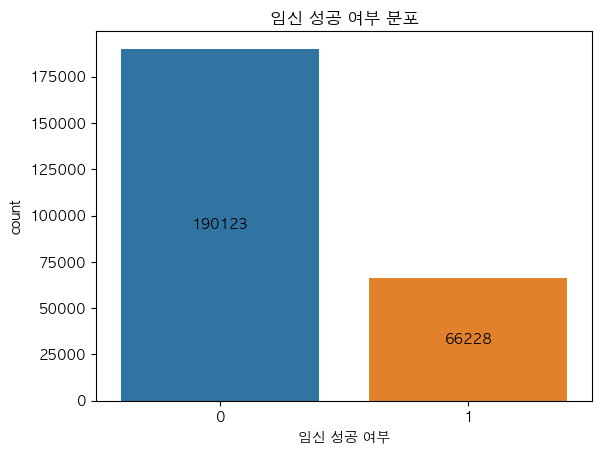

In [42]:
ax = sns.countplot(x=train['임신 성공 여부'], )
for bar in ax.containers:
    ax.bar_label(bar, fmt='%d', label_type='center', fontsize=10, fontweight='bold')
plt.title('임신 성공 여부 분포')
plt.show()

# Variable distribution

In [69]:
train.describe()

,임신 시도 또는 마지막 임신 경과 연수,배란 자극 여부,단일 배아 이식 여부,착상 전 유전 검사 사용 여부,착상 전 유전 진단 사용 여부,남성 주 불임 원인,남성 부 불임 원인,여성 주 불임 원인,여성 부 불임 원인,부부 주 불임 원인,부부 부 불임 원인,불명확 불임 원인,불임 원인 - 난관 질환,불임 원인 - 남성 요인,불임 원인 - 배란 장애,불임 원인 - 여성 요인,불임 원인 - 자궁경부 문제,불임 원인 - 자궁내막증,불임 원인 - 정자 농도,불임 원인 - 정자 면역학적 요인,불임 원인 - 정자 운동성,불임 원인 - 정자 형태,총 생성 배아 수,미세주입된 난자 수,미세주입에서 생성된 배아 수,이식된 배아 수,미세주입 배아 이식 수,저장된 배아 수,미세주입 후 저장된 배아 수,해동된 배아 수,해동 난자 수,수집된 신선 난자 수,저장된 신선 난자 수,혼합된 난자 수,파트너 정자와 혼합된 난자 수,기증자 정자와 혼합된 난자 수,동결 배아 사용 여부,신선 배아 사용 여부,기증 배아 사용 여부,대리모 여부,PGD 시술 여부,PGS 시술 여부,난자 채취 경과일,난자 해동 경과일,난자 혼합 경과일,배아 이식 경과일,배아 해동 경과일,임신 성공 여부
count,9370.000000,256351.000000,250060.000000,2718.0,250060.000000,256351.000000,256351.000000,256351.000000,256351.000000,256351.000000,256351.000000,256351.000000,256351.000000,256351.000000,256351.000000,256351.0,256351.000000,256351.000000,256351.000000,256351.000000,256351.000000,256351.000000,250060.000000,250060.000000,250060.00000,250060.000000,250060.000000,250060.000000,250060.000000,250060.000000,250060.000000,250060.000000,250060.000000,250060.000000,250060.000000,250060.000000,250060.000000,250060.000000,250060.000000,250060.000000,2179.0,1929.0,198863.0,1436.000000,202616.000000,212785.000000,40369.000000,256351.000000
mean,9.270651,0.771286,0.233476,1.0,0.012781,0.028516,0.013115,0.030724,0.012432,0.033068,0.008765,0.250730,0.138704,0.372403,0.130392,0.0,0.000039,0.071394,0.001077,0.000004,0.000378,0.000558,5.061145,4.170799,2.84365,1.368156,0.724718,1.185975,0.612933,0.454571,0.046401,8.563717,0.093418,7.698928,7.107326,0.534728,0.160465,0.840342,0.009830,0.004195,1.0,1.0,0.0,0.001393,0.005385,3.254741,0.045629,0.258349
std,3.550313,0.420005,0.423043,0.0,0.112328,0.166441,0.113767,0.172568,0.110805,0.178814,0.093212,0.433434,0.345638,0.483446,0.336734,0.0,0.006246,0.257483,0.032795,0.001975,0.019449,0.023612,4.664337,5.625943,4.09464,0.771961,0.894352,2.502318,1.842522,1.415320,0.688246,7.317230,1.105882,6.451914,6.532466,2.509487,0.367038,0.366289,0.098656,0.064633,0.0,0.0,0.0,0.037307,0.111504,1.715697,0.418672,0.437728
min,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0,1.0,0.0,0.000000,0.000000,2.000000,0.000000,0.000000
50%,9.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,7.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0,1.0,0.0,0.000000,0.000000,3.000000,0.000000,0.000000
75%,11.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,7.000000,5.00000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,13.000000,0.000000,11.000000,11.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0,1.0,0.0,0.000000,0.000000,5.000000,0.000000,1.000000
max,20.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,51.000000,51.000000,43.00000,3.000000,3.000000,51.000000,51.000000,32.000000,36.000000,51.000000,51.000000,51

In [70]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256351 entries, 0 to 256350
Data columns (total 68 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   시술 시기 코드               256351 non-null  object 
 1   시술 당시 나이               256351 non-null  object 
 2   임신 시도 또는 마지막 임신 경과 연수  9370 non-null    float64
 3   시술 유형                  256351 non-null  object 
 4   특정 시술 유형               256349 non-null  object 
 5   배란 자극 여부               256351 non-null  int64  
 6   배란 유도 유형               256351 non-null  object 
 7   단일 배아 이식 여부            250060 non-null  float64
 8   착상 전 유전 검사 사용 여부       2718 non-null    float64
 9   착상 전 유전 진단 사용 여부       250060 non-null  float64
 10  남성 주 불임 원인             256351 non-null  int64  
 11  남성 부 불임 원인             256351 non-null  int64  
 12  여성 주 불임 원인             256351 non-null  int64  
 13  여성 부 불임 원인             256351 non-null  int64  
 14  부부 주 불임 원인             256351 non-nu

In [72]:
for col in categorical_columns:
    train[col] = train[col].astype(str)
    test[col] = test[col].astype(str)

In [73]:
from sklearn.preprocessing import  OrdinalEncoder

ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
y = train.pop('임신 성공 여부')
x_train_encoded = train.copy()
x_train_encoded[categorical_columns] = ordinal_encoder.fit_transform(train[categorical_columns])

x_test_encoded = test.copy()
x_test_encoded[categorical_columns] = ordinal_encoder.transform(test[categorical_columns])

In [74]:
x_train_encoded[numeric_columns] = x_train_encoded[numeric_columns].fillna(0)
x_test_encoded[numeric_columns] = x_test_encoded[numeric_columns].fillna(0)

In [75]:
x_train_encoded.head()

,시술 시기 코드,시술 당시 나이,임신 시도 또는 마지막 임신 경과 연수,시술 유형,특정 시술 유형,배란 자극 여부,배란 유도 유형,단일 배아 이식 여부,착상 전 유전 검사 사용 여부,착상 전 유전 진단 사용 여부,남성 주 불임 원인,남성 부 불임 원인,여성 주 불임 원인,여성 부 불임 원인,부부 주 불임 원인,부부 부 불임 원인,불명확 불임 원인,불임 원인 - 난관 질환,불임 원인 - 남성 요인,불임 원인 - 배란 장애,불임 원인 - 여성 요인,불임 원인 - 자궁경부 문제,불임 원인 - 자궁내막증,불임 원인 - 정자 농도,불임 원인 - 정자 면역학적 요인,불임 원인 - 정자 운동성,불임 원인 - 정자 형태,배아 생성 주요 이유,총 시술 횟수,클리닉 내 총 시술 횟수,IVF 시술 횟수,DI 시술 횟수,총 임신 횟수,IVF 임신 횟수,DI 임신 횟수,총 출산 횟수,IVF 출산 횟수,DI 출산 횟수,총 생성 배아 수,미세주입된 난자 수,미세주입에서 생성된 배아 수,이식된 배아 수,미세주입 배아 이식 수,저장된 배아 수,미세주입 후 저장된 배아 수,해동된 배아 수,해동 난자 수,수집된 신선 난자 수,저장된 신선 난자 수,혼합된 난자 수,파트너 정자와 혼합된 난자 수,기증자 정자와 혼합된 난자 수,난자 출처,정자 출처,난자 기증자 나이,정자 기증자 나이,동결 배아 사용 여부,신선 배아 사용 여부,기증 배아 사용 여부,대리모 여부,PGD 시술 여부,PGS 시술 여부,난자 채취 경과일,난자 해동 경과일,난자 혼합 경과일,배아 이식 경과일,배아 해동 경과일
0,6.0,0.0,0.0,1.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,5.0,4.0,2.0,2.0,2.0,2.0,0.0,0.0,7.0,0.0,5.0,5.0,0.0,1.0,3.0,4.0,6.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0
1,5.0,5.0,0.0,1.0,4.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,3.0,4.0,6.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,1.0,15.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,7.0,7.0,0.0,1.0,3.0,4.0,6.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0
3,2.0,1.0,0.0,1.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,4.0,4.0,0.0,1.0,3.0,4.0,6.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,3.0,0.0,0.0,1.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,6.0,6.0,2.0,2.0,0.0,0.0,0.0,0.0,7.0,0.0,6.0,6.0,0.0,1.0,3.0,4.0,6.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0


# Train

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [77]:
x_train, x_temp, y_train, y_temp = train_test_split(x_train_encoded, y, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [78]:
print(f'Train : {x_train.shape}, {y_train.shape}')
print(f'Validation : {x_val.shape}, {y_val.shape}')
print(f'Test : {x_test.shape}, {y_test.shape}')

Train : (205080, 67), (205080,)
Validation : (25635, 67), (25635,)
Test : (25636, 67), (25636,)


In [79]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

# Inference

In [80]:
predict_proba_val = model.predict_proba(x_val)
predict_proba_test = model.predict_proba(x_test)

from sklearn.metrics import roc_auc_score
print(f'Validation AUC : {roc_auc_score(y_val, predict_proba_val[:, 1])}')
print(f'Test AUC : {roc_auc_score(y_test, predict_proba_test[:, 1])}')

Validation AUC : 0.6998203125924698
Test AUC : 0.7068588256896381


# Submission Prediction

In [86]:
pred_proba = model.predict_proba(x_test_encoded)[:, 1]
submission = pd.read_csv(file_path + 'Data/sample_submission.csv')
submission['probability'] = pred_proba
submission.to_csv(file_path + 'Data/submission.csv', index=False)